# Basic tutorial 
first drawing from the examples in 
https://bodowinter.com/tutorial/bw_LME_tutorial1.pdf
and 
https://bodowinter.com/tutorial/bw_LME_tutorial2.pdf

In [4]:
pitch = c(233,204,242,130,112,142)
sex = c(rep("female",3),rep("male",3))
my.df = data.frame(sex,pitch)
my.df

sex,pitch
<chr>,<dbl>
female,233
female,204
female,242
male,130
male,112
male,142


In [5]:
xmdl = lm(pitch ~ sex, my.df)

In [6]:
summary(xmdl)


Call:
lm(formula = pitch ~ sex, data = my.df)

Residuals:
      1       2       3       4       5       6 
  6.667 -22.333  15.667   2.000 -16.000  14.000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   226.33      10.18  22.224 2.43e-05 ***
sexmale       -98.33      14.40  -6.827  0.00241 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.64 on 4 degrees of freedom
Multiple R-squared:  0.921,	Adjusted R-squared:  0.9012 
F-statistic: 46.61 on 1 and 4 DF,  p-value: 0.002407


In [8]:
mean(my.df[my.df$sex=="male",]$pitch)

[1] 128

In [13]:
age = c(14,23,35,48,52,67)
pitch = c(252,244,240,233,212,204)
my.df = data.frame(age,pitch)
xmdl = lm(pitch ~ age, my.df)
summary(xmdl)


Call:
lm(formula = pitch ~ age, data = my.df)

Residuals:
     1      2      3      4      5      6 
-2.338 -2.149  4.769  9.597 -7.763 -2.115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 267.0765     6.8522   38.98 2.59e-06 ***
age          -0.9099     0.1569   -5.80  0.00439 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.886 on 4 degrees of freedom
Multiple R-squared:  0.8937,	Adjusted R-squared:  0.8672 
F-statistic: 33.64 on 1 and 4 DF,  p-value: 0.004395


In [10]:
my.df$age.c = my.df$age - mean(my.df$age)
xmdl = lm(pitch ~ age.c, my.df)
summary(xmdl)


Call:
lm(formula = pitch ~ age.c, data = my.df)

Residuals:
     1      2      3      4      5      6 
-2.338 -2.149  4.769  9.597 -7.763 -2.115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 230.8333     2.8113   82.11 1.32e-07 ***
age.c        -0.9099     0.1569   -5.80  0.00439 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.886 on 4 degrees of freedom
Multiple R-squared:  0.8937,	Adjusted R-squared:  0.8672 
F-statistic: 33.64 on 1 and 4 DF,  p-value: 0.004395


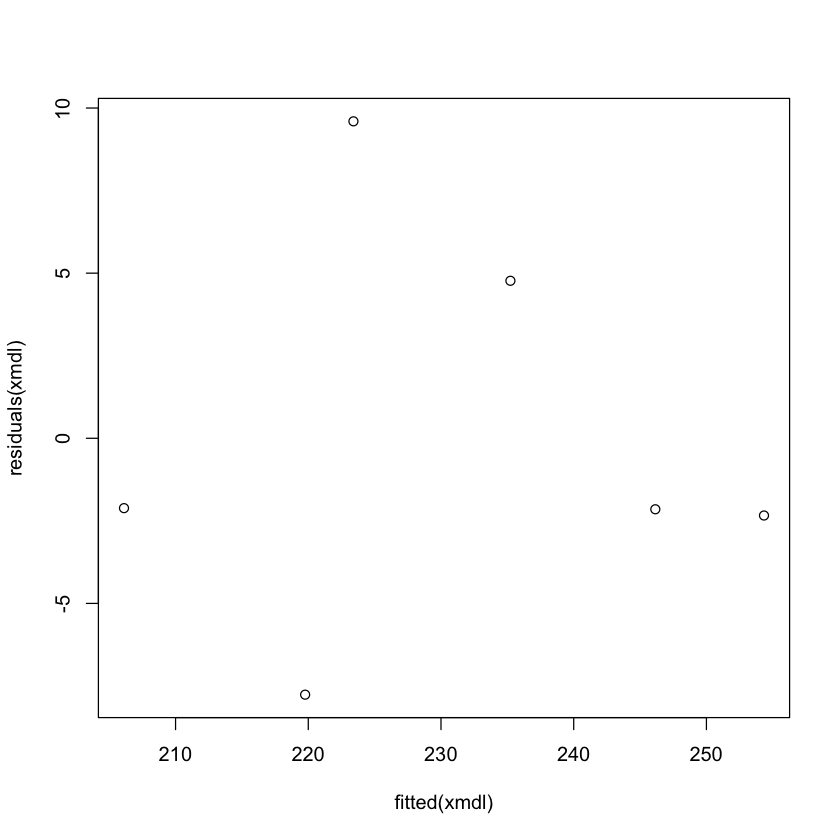

In [14]:
plot(fitted(xmdl),residuals(xmdl))

In [15]:
dfbeta(xmdl)

,(Intercept),age
1,-3.3645662,0.06437573
2,-1.6119656,0.02736278
3,1.5481303,-0.01456709
4,-0.0259835,0.05092767
5,0.8707699,-0.06479736
6,1.8551808,-0.06622744


# testing on DSQ data

In [1]:
install.packages("lme4")


The downloaded binary packages are in
	/var/folders/9f/ncdby2b928950jvdsrk4vb9h0000gn/T//RtmpVXgUN8/downloaded_packages


In [2]:
library(lme4)

Warning message:
“package ‘lme4’ was built under R version 4.1.2”
Loading required package: Matrix



In [5]:
qoms.df = read.csv("Participants_Pieces_motion_judgements.csv")

In [5]:
hallQ = qoms.df[ which(qoms.df$Condition=='Hall'), ]

In [6]:
hallV = hallQ[ which(!is.na(hallQ$Motion_seen)), ]

In [10]:
colnames(hallQ)

ERROR: Error in is.data.frame(x): object 'qoms' not found


In [9]:
which(!complete.cases(hallQ))

[1]   2  17  20  58  68  80  81  86  87 102 105 109 130 143 149 153 157 165 166
[20] 190 191 202 209 235 238 242 243 249 250 275 276 287 320 321 323 327 328 334
[39] 335

In [10]:
xmdl = lm(mQoM ~ Music, hallQ)
summary(xmdl)


Call:
lm(formula = mQoM ~ Music, data = hallQ)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068235 -0.021423 -0.008595  0.010954  0.300160 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.089125   0.004300  20.726  < 2e-16 ***
MusicBeethoven -0.001481   0.006007  -0.247    0.805    
MusicFolk       0.037473   0.006081   6.162 2.21e-09 ***
MusicSchnittke  0.005041   0.006081   0.829    0.408    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03798 on 312 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:   0.15,	Adjusted R-squared:  0.1418 
F-statistic: 18.35 on 3 and 312 DF,  p-value: 5.458e-11


ERROR: Error in theme(axis.text.x = element_text(angle = 60, hjust = 1)): could not find function "theme"


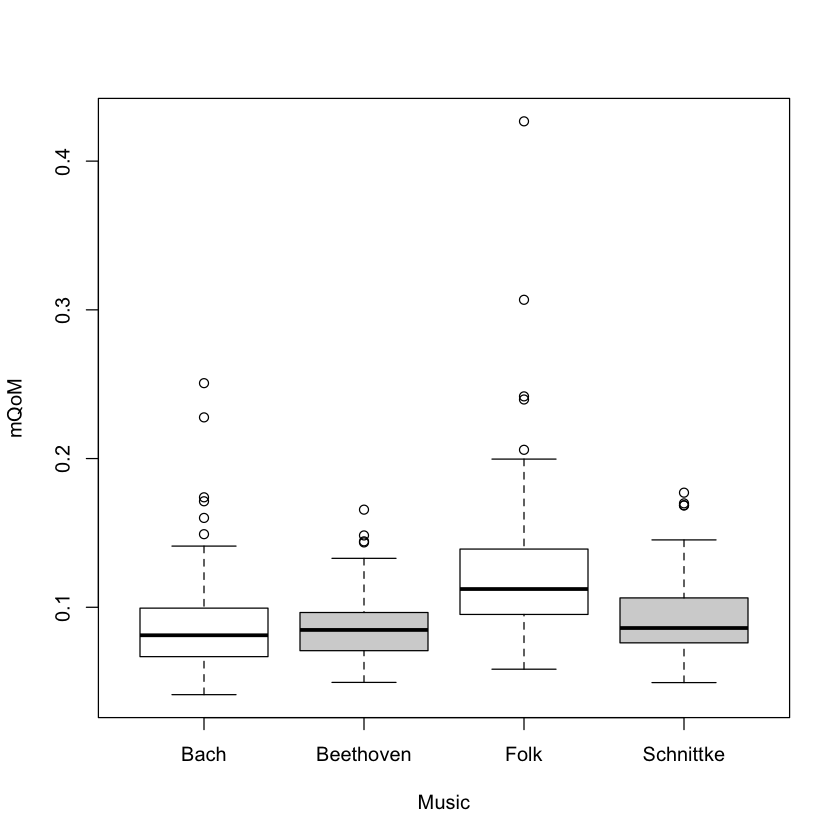

In [12]:
# boxplot(mQoM ~ Condition*Music,col=c("white","lightgray"),qoms.df)
q = boxplot(mQoM ~ Music,col=c("white","lightgray"),hallQ)
#q + theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [8]:
claps.df = read.csv("/Users/finn/Desktop/Current_Projects/Copen/AudienceClapping/Cl_Coordination/Clapping_Coordination/Clapping_traints_Part_rated.csv")

In [18]:
clappings = claps.df[which(!is.na(claps.df$AWE)),]

In [ ]:
['Type', 'Type_M', 'Instance', 'Time', 'Event_tag', 'Participant', 'Age',
       'Gender', 'Musicianship', 'Fan_status', 'Seat_Zone', 'KM', 'AWE',
       'Moved', 'Clap Count', 'ICI Median', 'Average Rate', 'ICI STD',
       'ICI quartiles', 'Relative first clap', 'Relative last clap',
       'Initial 8s ICI Median', 'Initial 8s ICI quartiles', 'Music_Exp']

In [19]:
colnames(clappings)

[1] "X"                        "Type"                    
 [3] "Type_M"                   "Instance"                
 [5] "Time"                     "Event_tag"               
 [7] "Participant"              "Age"                     
 [9] "Gender"                   "Musicianship"            
[11] "Fan_status"               "Seat_Zone"               
[13] "KM"                       "AWE"                     
[15] "Moved"                    "Clap.Count"              
[17] "ICI.Median"               "Average.Rate"            
[19] "ICI.STD"                  "ICI.quartiles"           
[21] "Relative.first.clap"      "Relative.last.clap"      
[23] "Initial.8s.ICI.Median"    "Initial.8s.ICI.quartiles"
[25] "Music_Exp"

In [35]:
xmdl = lm(Relative.first.clap ~ AWE + Music_Exp + Age, clappings)
summary(xmdl)


Call:
lm(formula = Relative.first.clap ~ AWE + Music_Exp + Age, data = clappings)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7588 -0.9956 -0.3946  0.8713  6.7356 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.30991    0.90262  -0.343   0.7320  
AWE          0.23305    0.13607   1.713   0.0895 .
Music_Exp   -0.07048    0.13049  -0.540   0.5902  
Age          0.02742    0.01089   2.517   0.0132 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.625 on 113 degrees of freedom
  (33 observations deleted due to missingness)
Multiple R-squared:  0.1356,	Adjusted R-squared:  0.1127 
F-statistic:  5.91 on 3 and 113 DF,  p-value: 0.0008778


In [22]:
xmdl = lm(Relative.first.clap ~ AWE, clappings)
summary(xmdl)


Call:
lm(formula = Relative.first.clap ~ AWE, data = clappings)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5704 -1.1755 -0.3149  0.5831  7.4809 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.7941     0.4953   1.603   0.1110  
AWE           0.2913     0.1163   2.506   0.0133 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.606 on 148 degrees of freedom
Multiple R-squared:  0.04069,	Adjusted R-squared:  0.03421 
F-statistic: 6.278 on 1 and 148 DF,  p-value: 0.01331


In [23]:
xmdl = lm(Relative.first.clap ~ Age, clappings)
summary(xmdl)


Call:
lm(formula = Relative.first.clap ~ Age, data = clappings)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5662 -1.0923 -0.3823  0.5443  6.9131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.160653   0.511333   0.314 0.753950    
Age         0.033410   0.008842   3.778 0.000252 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.634 on 115 degrees of freedom
  (33 observations deleted due to missingness)
Multiple R-squared:  0.1104,	Adjusted R-squared:  0.1027 
F-statistic: 14.28 on 1 and 115 DF,  p-value: 0.0002516


In [24]:
xmdl = lm(Relative.first.clap ~ Music_Exp, clappings)
summary(xmdl)


Call:
lm(formula = Relative.first.clap ~ Music_Exp, data = clappings)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1775 -1.0947 -0.3851  0.6064  7.6025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.44676    0.20672  11.836  < 2e-16 ***
Music_Exp   -0.26927    0.09475  -2.842  0.00512 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.596 on 148 degrees of freedom
Multiple R-squared:  0.05175,	Adjusted R-squared:  0.04534 
F-statistic: 8.077 on 1 and 148 DF,  p-value: 0.005117


In [53]:
hallQ.model = lmer(mQoM ~ Music + (1|Participant), data=hallQ)
summary(hallQ.model)

Linear mixed model fit by REML ['lmerMod']
Formula: mQoM ~ Music + (1 | Participant)
   Data: hallQ

REML criterion at convergence: -1212.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1071 -0.4042 -0.0615  0.2493  8.2097 

Random effects:
 Groups      Name        Variance  Std.Dev.
 Participant (Intercept) 0.0006611 0.02571 
 Residual                0.0007771 0.02788 
Number of obs: 316, groups:  Participant, 85

Fixed effects:
                Estimate Std. Error t value
(Intercept)     0.089324   0.004243  21.050
MusicBeethoven -0.002185   0.004455  -0.490
MusicFolk       0.037922   0.004471   8.482
MusicSchnittke  0.003963   0.004515   0.878

Correlation of Fixed Effects:
            (Intr) MscBth MscFlk
MusicBethvn -0.542              
MusicFolk   -0.527  0.502       
MuscSchnttk -0.533  0.513  0.495

In [55]:
hallQ.model = lmer(mQoM ~ Music + aware_movement + (1|Participant), data=hallQ)
summary(hallQ.model)

Linear mixed model fit by REML ['lmerMod']
Formula: mQoM ~ Music + aware_movement + (1 | Participant)
   Data: hallQ

REML criterion at convergence: -1181.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1471 -0.3909 -0.0484  0.2607  8.1267 

Random effects:
 Groups      Name        Variance  Std.Dev.
 Participant (Intercept) 0.0006764 0.02601 
 Residual                0.0007813 0.02795 
Number of obs: 316, groups:  Participant, 85

Fixed effects:
                                               Estimate Std. Error t value
(Intercept)                                    0.094620   0.015399   6.145
MusicBeethoven                                -0.002381   0.004576  -0.520
MusicFolk                                      0.038403   0.004971   7.726
MusicSchnittke                                 0.004004   0.004612   0.868
aware_movementNot aware of movement           -0.005650   0.015750  -0.359
aware_movementYes and I moved a normal amount -0.003039   0.015250  -0.199
aware_

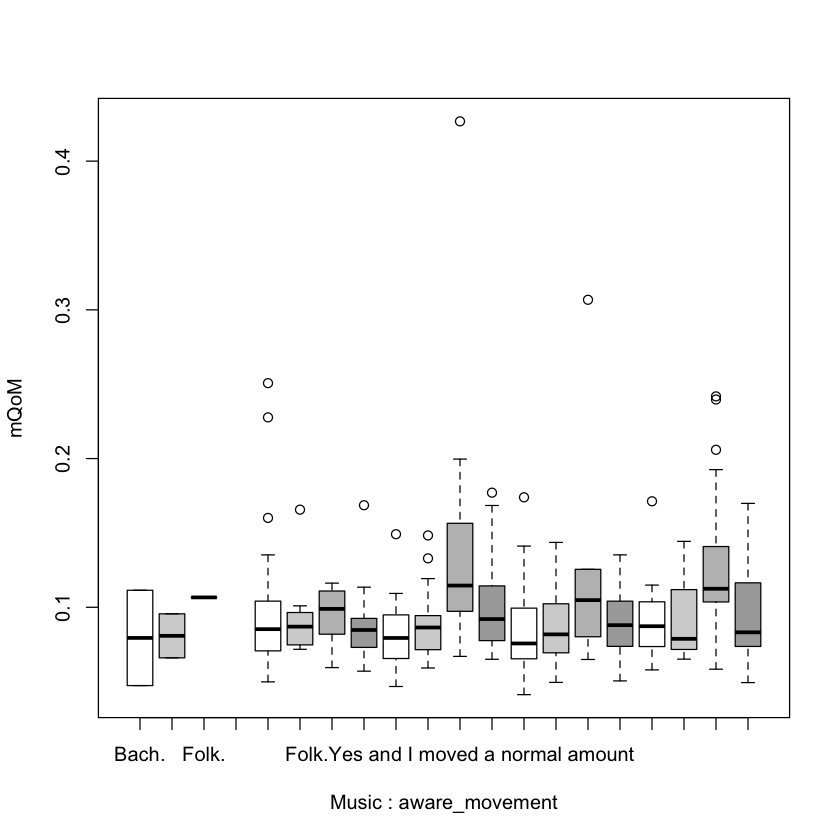

In [64]:
q <-boxplot(mQoM ~ Music + aware_movement,col=c("white","lightgray","gray","darkgray"),hallQ)

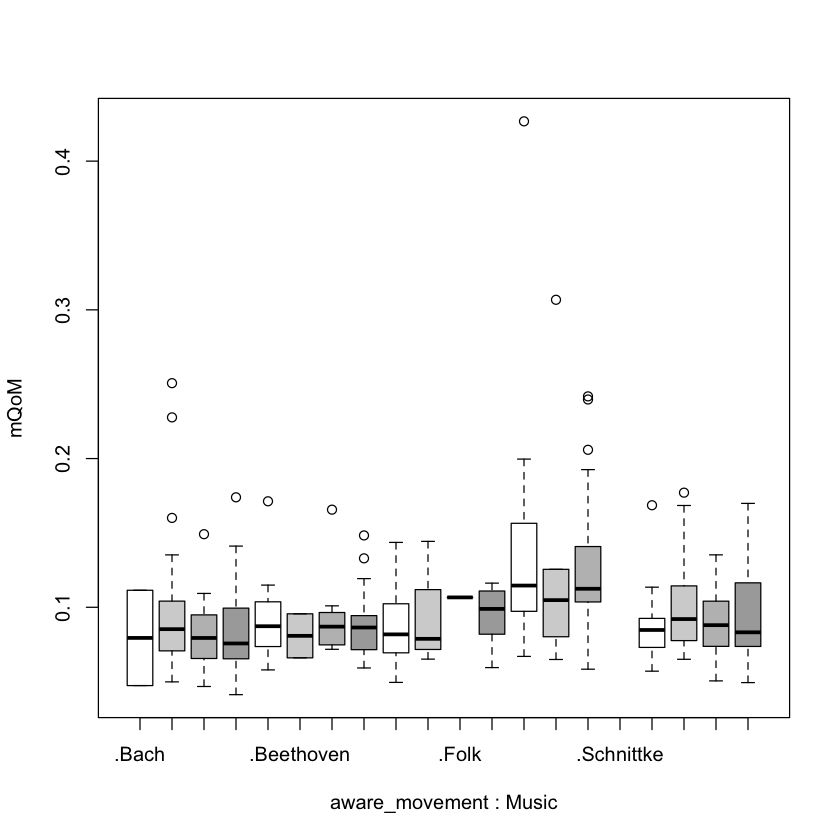

In [65]:
boxplot(mQoM ~ aware_movement + Music,col=c("white","lightgray","gray","darkgray"),hallQ)

In [60]:
hallV.model = lmer(Motion_seen ~ Music + aware_others_moving + (1|Participant), data=hallV)
summary(hallV.model) 

Linear mixed model fit by REML ['lmerMod']
Formula: Motion_seen ~ Music + aware_others_moving + (1 | Participant)
   Data: hallV

REML criterion at convergence: -1643.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8039 -0.5288 -0.0385  0.4140  4.0940 

Random effects:
 Groups      Name        Variance  Std.Dev.
 Participant (Intercept) 0.0002157 0.01469 
 Residual                0.0001952 0.01397 
Number of obs: 325, groups:  Participant, 82

Fixed effects:
                                                       Estimate Std. Error
(Intercept)                                            0.084907   0.006619
MusicBeethoven                                         0.001920   0.002203
MusicFolk                                              0.030274   0.002501
MusicSchnittke                                         0.006444   0.002220
aware_others_movingNot aware of others' movement      -0.001518   0.006484
aware_others_movingYes and they moved a normal amount  0.001552   0.0

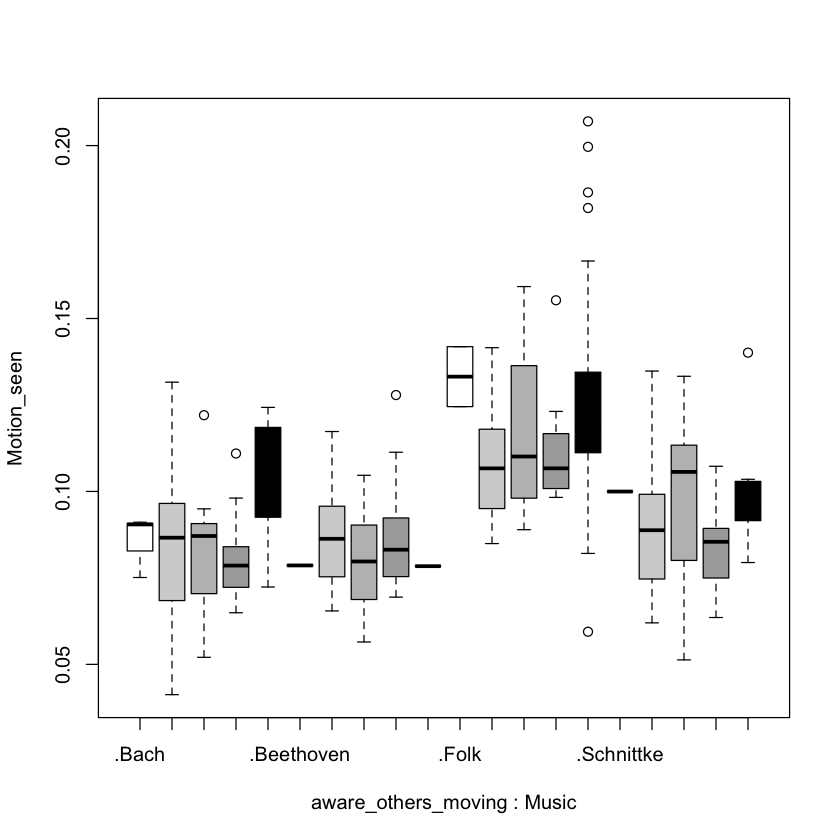

In [67]:
boxplot(Motion_seen ~ aware_others_moving + Music,col=c("white","lightgray","gray","darkgray","Black"),hallV)

In [76]:
# Testing music as a factor for aware_others_moving
hallV.null = lmer(Motion_seen ~ Music + (1|Participant), data=hallV, REML=FALSE)
hallV.model = lmer(Motion_seen ~ aware_others_moving + Music + (1|Participant), data=hallV, REML=FALSE)

anova(hallV.null,hallV.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallV.null,6,-1702.305,-1679.602,857.1525,-1714.305,NA,NA,NA
hallV.model,10,-1703.897,-1666.059,861.9486,-1723.897,9.592289,4,0.04788507


In [81]:
#aware_movement
hallQ.null = lmer(mQoM ~ (1|Participant), data=hallQ, REML=FALSE)
hallQ.model = lmer(mQoM ~ Music + (1|Participant), data=hallQ, REML=FALSE)

anova(hallQ.null,hallQ.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallQ.null,3,-1155.769,-1144.502,580.8845,-1161.769,NA,NA,NA
hallQ.model,6,-1237.640,-1215.106,624.8200,-1249.640,87.87106,3,6.277188e-19


In [82]:
#aware_movement
hallQ.null = lmer(mQoM ~ (1|Participant), data=hallQ, REML=FALSE)
hallQ.model = lmer(mQoM ~ aware_movement + (1|Participant), data=hallQ, REML=FALSE)

anova(hallQ.null,hallQ.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallQ.null,3,-1155.769,-1144.502,580.8845,-1161.769,NA,NA,NA
hallQ.model,7,-1166.814,-1140.524,590.4069,-1180.814,19.04485,4,0.0007701566


In [83]:
#aware_movement
hallQ.null = lmer(mQoM ~ aware_movement + (1|Participant), data=hallQ, REML=FALSE)
hallQ.model = lmer(mQoM ~ Music + aware_movement + (1|Participant), data=hallQ, REML=FALSE)

anova(hallQ.null,hallQ.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallQ.null,7,-1166.814,-1140.524,590.4069,-1180.814,NA,NA,NA
hallQ.model,10,-1230.912,-1193.354,625.4559,-1250.912,70.09805,3,4.066902e-15


In [88]:
#aware_movement
hallQ.null = lmer(mQoM ~ Music + aware_movement + (1|Participant), data=hallQ, REML=FALSE)
hallQ.model = lmer(mQoM ~ Music + aware_movement + Music*aware_movement + (1|Participant), data=hallQ, REML=FALSE)

anova(hallQ.null,hallQ.model)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallQ.null,10,-1230.912,-1193.354,625.4559,-1250.912,NA,NA,NA
hallQ.model,21,-1220.886,-1142.015,631.4428,-1262.886,11.97374,11,0.3656202


In [73]:
# Testing music as a factor for Motion_seen
hallV.null = lmer(Motion_seen ~ aware_others_moving + (1|Participant), data=hallV, REML=FALSE)
hallV.model = lmer(Motion_seen ~ aware_others_moving + Music + (1|Participant), data=hallV, REML=FALSE)

anova(hallV.null,hallV.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallV.null,7,-1577.829,-1551.343,795.9147,-1591.829,NA,NA,NA
hallV.model,10,-1703.897,-1666.059,861.9486,-1723.897,132.0678,3,1.93831e-28


In [78]:
# Testing interaction of music and aware others as a factor for Motion_seen 
hallV.null = lmer(Motion_seen ~ aware_others_moving + Music + (1|Participant), data=hallV, REML=FALSE)
hallV.model = lmer(Motion_seen ~ aware_others_moving + Music + aware_others_moving*Music + (1|Participant), data=hallV, REML=FALSE)

anova(hallV.null,hallV.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallV.null,10,-1703.897,-1666.059,861.9486,-1723.897,NA,NA,NA
hallV.model,22,-1694.616,-1611.371,869.3078,-1738.616,14.71827,12,0.2572061


In [117]:
# hallV.model = lmer(Motion_seen ~ Music + aware_others_moving + (1+Music|Participant), data=hallV, REML=FALSE)
hallV.model = lmer(Motion_seen ~ Music + aware_others_moving + (1|Participant), data=hallV, REML=FALSE)                  

In [96]:
hallF = hallQ[ which(hallQ$Music=='Folk'), ]
hallC = hallQ[ which(!hallQ$Music=='Folk'), ]

In [98]:
hallC.null = lmer(mQoM ~ (1|Participant), data=hallC, REML=FALSE)
hallC.model = lmer(mQoM ~ aware_movement + (1|Participant), data=hallC, REML=FALSE)

anova(hallC.null,hallC.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hallC.null,3,-1096.372,-1085.956,551.1862,-1102.372,NA,NA,NA
hallC.model,7,-1093.971,-1069.665,553.9853,-1107.971,5.598031,4,0.2312459


In [103]:
hallF.null = lmer(mQoM ~ (1|Participant), data=hallF, REML=FALSE)
hallF.model = lmer(mQoM ~ aware_movement + (1|Participant), data=hallF, REML=FALSE)

anova(hallF.null,hallF.model)

ERROR: Error: number of levels of each grouping factor must be < number of observations (problems: Participant)


In [ ]:
xmdl = lm(mQoM ~ Music, hallQ)
summary(xmdl)

In [107]:
unique(hallF["aware_movement"])

,aware_movement
,<chr>
337,Yes and I moved more than usual
339,Yes and I moved less than usual
341,Yes and I moved a normal amount
347,Not aware of movement
400,


In [112]:
# my.df$age.c = my.df$age - mean(my.df$age)
x <- factor(hallF$aware_movement,order=TRUE,
            levels=c("","Not aware of movement","Yes and I moved less than usual","Yes and I moved a normal amount","Yes and I moved more than usual"),
            label=c("","Not","Less","Normal","More"))
hallF$aware_movement.c <- x

In [113]:
hallF

,X,Participant,Condition,Music,mQoM,aware_body,aware_movement,aware_others_moving,Motion_seen,Motion_seen_Max,aware_movement.c
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>
337,0,ADQ001,Hall,Folk,0.09335358,Continuously,Yes and I moved more than usual,Yes and they moved more than usual,0.19963947,0.19963947,More
338,1,ADQ002,Hall,Folk,0.11209625,Intermittently,Yes and I moved more than usual,Yes and they moved more than usual,0.09124720,0.11398778,More
339,2,ADQ003,Hall,Folk,0.12551749,Intermittently,Yes and I moved less than usual,Yes and they moved less than usual,0.15527491,0.18717728,Less
340,3,ADQ004,Hall,Folk,0.17892072,Intermittently,Yes and I moved more than usual,Yes and they moved more than usual,0.11985552,0.12887017,More
341,4,ADQ005,Hall,Folk,0.10611576,Rarely,Yes and I moved a normal amount,Yes and they moved less than usual,0.09890939,0.09890939,Normal
342,5,ADQ006,Hall,Folk,0.10703876,Rarely,Yes and I moved more than usual,Yes and they moved more than usual,0.11401292,0.14379373,More
343,6,ADQ007,Hall,Folk,0.12854401,Continuously,Yes and I moved more than usual,Yes and they moved more than usual,0.11232792,0.16603683,More
344,7,ADQ008,Hall,Folk,0.11460464,Intermittently,Yes and I moved a normal amount,Yes and they moved a normal amount,0.10745336,0.10788366,Normal
345,8,ADQ009,Hall,Folk,0.08158933,Intermittently,Yes and I moved a normal amount,Yes and they moved a normal amount,0.08893947,0.11398778,Normal


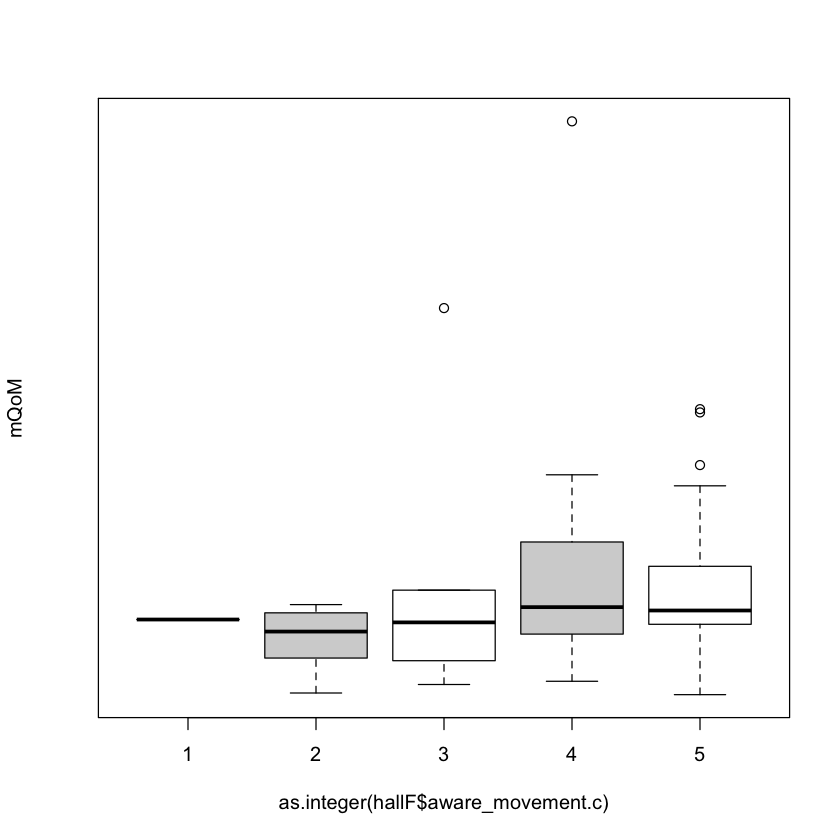

In [115]:
#boxplot(mQoM ~ aware_movement,col=c("white","lightgray"),hallF)
#boxplot(as.integer(data$var), yaxt = "n")
#axis(2, at = c(1, 2, 3), labels = c("Low", "Medium", "High"))
boxplot(mQoM ~ as.integer(hallF$aware_movement.c),col=c("white","lightgray"), yaxt = "n",hallF)
axis(2, at = c(1, 2, 3, 4, 5), labels=c("","Not","Less","Normal","More"))
